In [12]:
import pandas as pd
df = pd.read_csv('problem2.csv')
df.head()

,houseCode,date,power consumption
0,house_01,2050-01-14 21:00:00,57.559878
1,house_26,2050-01-02 19:10:00,59.726880
2,house_25,2050-01-13 07:20:00,6.558823
3,house_20,2050-01-26 04:55:00,58.514589
4,house_09,2050-01-18 22:50:00,5.717009


1. 데이터 전처리

각 가구의 15분 간격의 전력량의 합을 구하고 해당 데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라. 군집화를 위한 데이터 구성의 이유를 설명하라. (군집 방식에 따라 cluster 컬럼의 값은 달라질 수 있음)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401760 entries, 0 to 401759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   houseCode          401760 non-null  object 
 1   date               401760 non-null  object 
 2   power consumption  401760 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


In [14]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,houseCode,date,power consumption
0,house_01,2050-01-14 21:00:00,57.559878
1,house_26,2050-01-02 19:10:00,59.726880
2,house_25,2050-01-13 07:20:00,6.558823
3,house_20,2050-01-26 04:55:00,58.514589
4,house_09,2050-01-18 22:50:00,5.717009


In [16]:
#index 설정

df.set_index('date',inplace=True)
df

,houseCode,power consumption
date,,
2050-01-14 21:00:00,house_01,57.559878
2050-01-02 19:10:00,house_26,59.726880
2050-01-13 07:20:00,house_25,6.558823
2050-01-26 04:55:00,house_20,58.514589
2050-01-18 22:50:00,house_09,5.717009
...,...,...
2050-01-14 06:15:00,house_11,58.752685
2050-01-29 03:10:00,house_13,75.546362
2050-01-09 08:25:00,house_35,92.245478


In [20]:
df2 = df.groupby(['houseCode']).resample('15T').sum()
df2

power consumption
houseCode date                                  
house_00  2050-01-01 00:00:00         136.249952
          2050-01-01 00:15:00          98.283387
          2050-01-01 00:30:00          53.967679
          2050-01-01 00:45:00         204.821270
          2050-01-01 01:00:00         150.760786
...                                          ...
house_44  2050-01-31 22:45:00         334.675717
          2050-01-31 23:00:00         463.419892
          2050-01-31 23:15:00         369.930740
          2050-01-31 23:30:00         237.713030
          2050-01-31 23:45:00         184.888439

[133920 rows x 1 columns]

In [21]:
df2.reset_index(inplace=True)
df2

,houseCode,date,power consumption
0,house_00,2050-01-01 00:00:00,136.249952
1,house_00,2050-01-01 00:15:00,98.283387
2,house_00,2050-01-01 00:30:00,53.967679
3,house_00,2050-01-01 00:45:00,204.821270
4,house_00,2050-01-01 01:00:00,150.760786
...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717
133916,house_44,2050-01-31 23:00:00,463.419892
133917,house_44,2050-01-31 23:15:00,369.930740
133918,house_44,2050-01-31 23:30:00,237.713030


In [27]:
from sklearn.cluster import KMeans
km_data = df2[['power consumption']]
km = KMeans(n_clusters=5)
km.fit(km_data)

new_labels = km.labels_
df2['cluster'] = new_labels
df2

,houseCode,date,power consumption,cluster
0,house_00,2050-01-01 00:00:00,136.249952,0
1,house_00,2050-01-01 00:15:00,98.283387,0
2,house_00,2050-01-01 00:30:00,53.967679,0
3,house_00,2050-01-01 00:45:00,204.821270,4
4,house_00,2050-01-01 01:00:00,150.760786,4
...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,1
133916,house_44,2050-01-31 23:00:00,463.419892,3
133917,house_44,2050-01-31 23:15:00,369.930740,1
133918,house_44,2050-01-31 23:30:00,237.713030,2


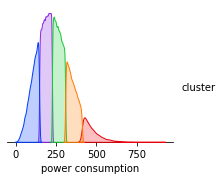

In [29]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df2,
             diag_kind='kde',
             hue='cluster',
             corner=True,
             palette='bright')
plt.show()

2. 히트맵 

2-1의 데이터를 바탕으로 각 군집의 요일, 15분 간격별 전력 사용량의 합을 구한 후 아래와 같이 시각화하여라. (수치는 동일하지 않을 수 있음, 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환됐는지 주로 확인)

In [34]:
# 요일 구하기
import datetime as dt
df2['week_day'] = df2['date'].dt.day_name()
df2.head()

,houseCode,date,power consumption,cluster,week_day
0,house_00,2050-01-01 00:00:00,136.249952,0,Saturday
1,house_00,2050-01-01 00:15:00,98.283387,0,Saturday
2,house_00,2050-01-01 00:30:00,53.967679,0,Saturday
3,house_00,2050-01-01 00:45:00,204.821270,4,Saturday
4,house_00,2050-01-01 01:00:00,150.760786,4,Saturday


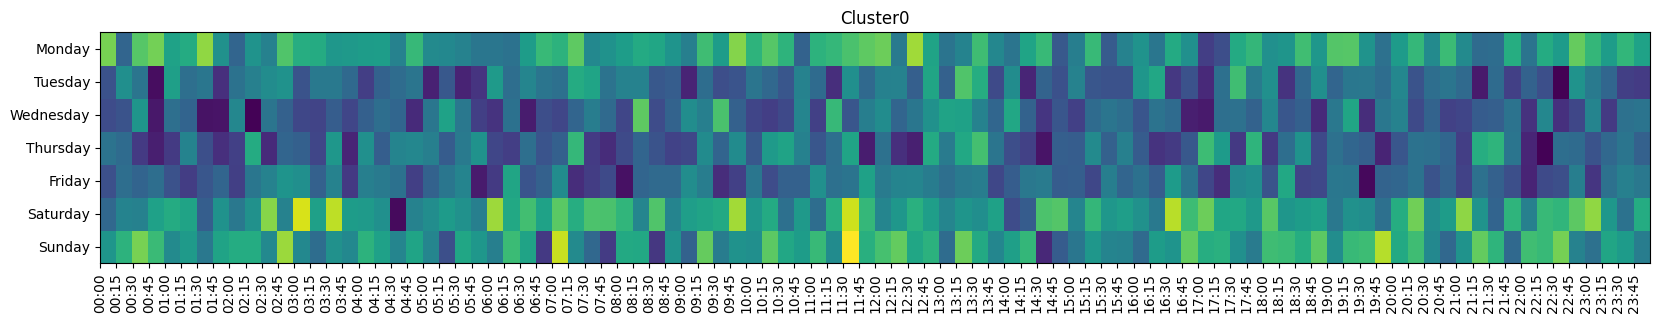

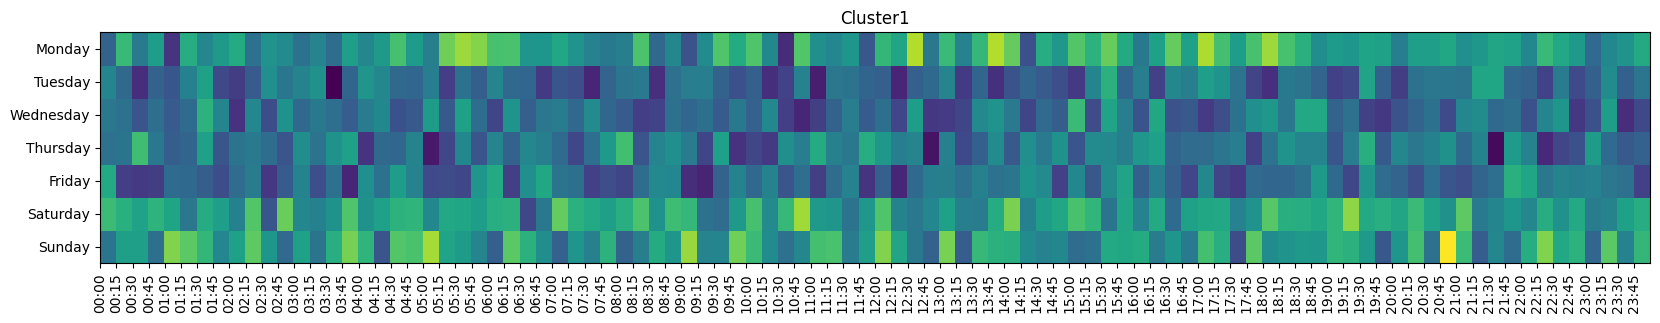

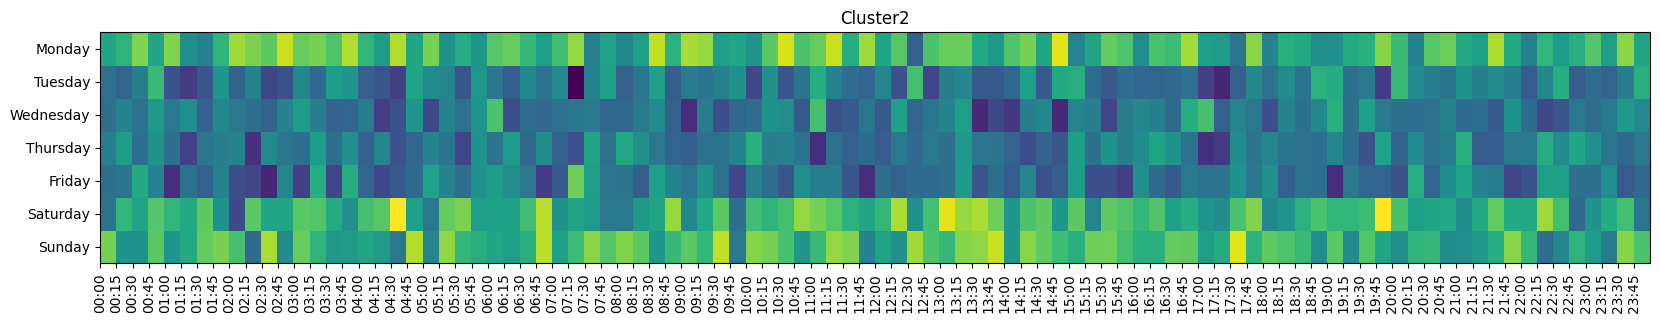

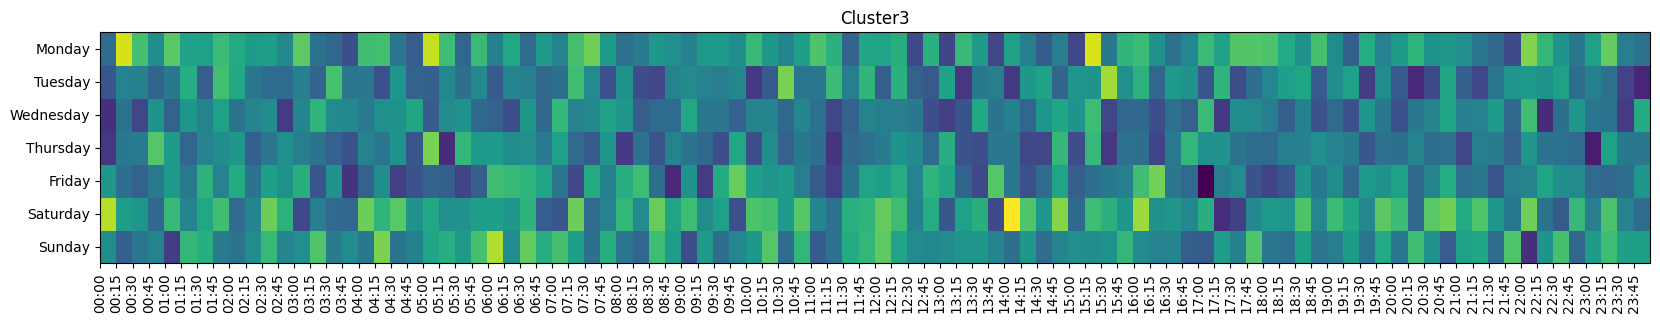

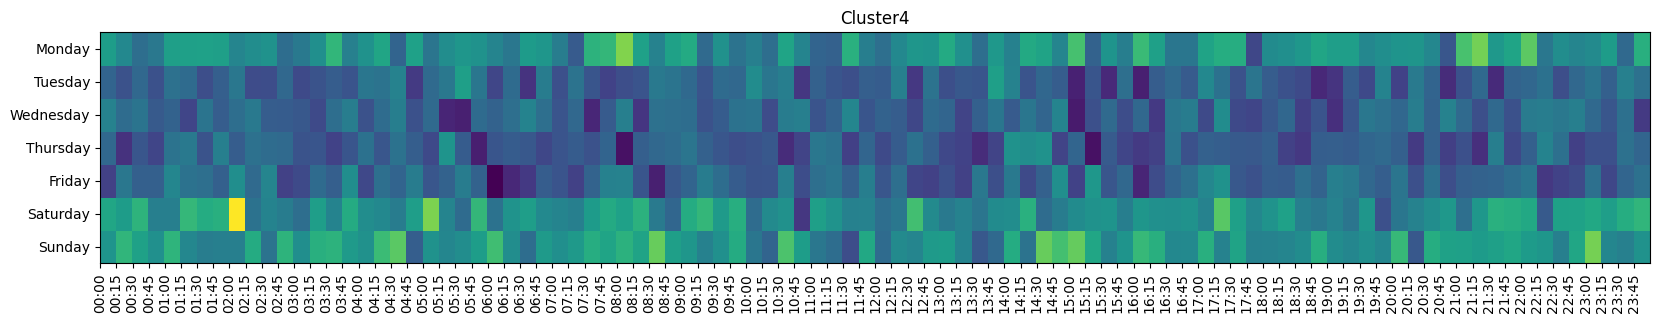

In [38]:
import numpy as np

df2['min'] = df2['date'].dt.strftime("%H:%M")

pv = df2.groupby(['cluster','week_day','min'],as_index=False).sum()

for v in range(5):
    plt.figure(figsize=(20,3))
    target = pv.loc[pv.cluster==v]
    pvt = target.pivot(index='week_day',columns='min',values='power consumption').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('Cluster' + str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns, rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5, pvt.index)